In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

## Load Data

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Dataset/insurance2.csv")
data

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


# Data Pre-Processing and Cleansing

In [ ]:
# check dataset size
data.shape

(1338, 8)

In [ ]:
# check data type
data.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [ ]:
# Cek Summary Data
data.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


**Cek Korelasi Data**

In [ ]:
# Cek Korelasi
data.corr()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


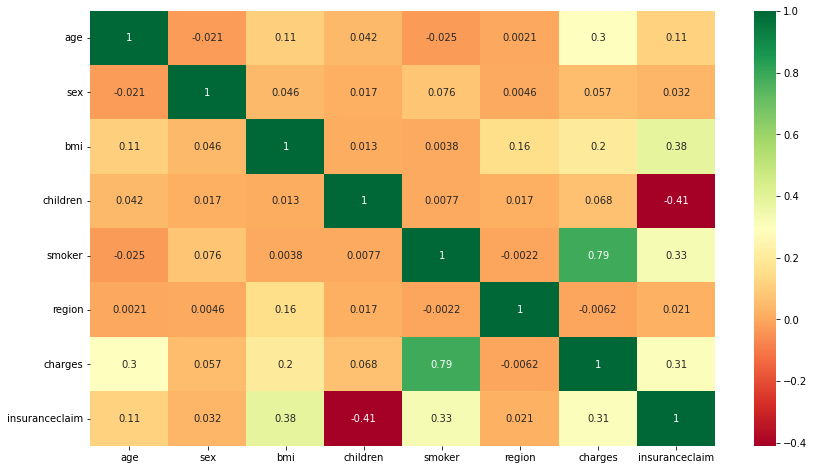

In [ ]:
#Plotting correlation
corrmat=data.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(14,8))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF 
datas = data.drop(columns='insuranceclaim', axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = datas.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(datas.values, i)
                          for i in range(len(datas.columns))]
  
print(vif_data)

    feature        VIF
0       age   9.247094
1       sex   2.007028
2       bmi  10.465005
3  children   1.805834
4    smoker   4.008939
5    region   2.951032
6   charges   7.922113


**Mengatasi Missing Value**

In [ ]:
# Handling Missing Value
data.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

**Mengatasi Data Duplikasi**

In [ ]:
# Handling Duplicated Data
duplicate_data = data.duplicated()
print("sum of duplicates =", duplicate_data.sum(), "\n")
data[duplicate_data]

sum of duplicates = 1 



,age,sex,bmi,children,smoker,region,charges,insuranceclaim
581,19,1,30.59,0,0,1,1639.5631,1


In [ ]:
data.duplicated().sum()

1

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.shape

(1337, 8)

**Mengatasi Outlier**

In [ ]:
# Handling Outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                  24.00000
sex                   1.00000
bmi                   8.41000
children              2.00000
smoker                0.00000
region                1.00000
charges           11911.37345
insuranceclaim        1.00000
dtype: float64


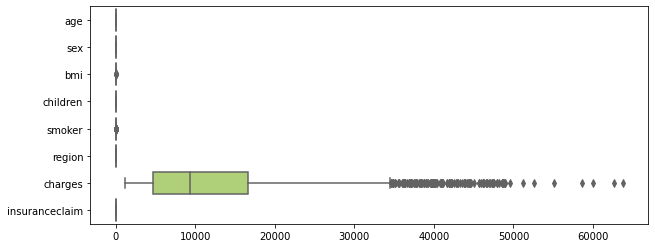

In [ ]:
ax = sns.boxplot(data=data, orient="h", palette="Set3")

In [ ]:
Q1 = np.percentile(data['charges'], 25,
                   interpolation = 'midpoint')
Q3 = np.percentile(data['charges'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data.shape)
 
# Upper bound
upper = np.where(data['charges'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data['charges'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
 
print("New Shape: ", data.shape)

Old Shape:  (1337, 8)
New Shape:  (1198, 8)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000
mean,39.048414,0.493322,30.486974,1.095993,0.166945,1.512521,11831.481975,0.570952
std,14.019893,0.500164,6.059417,1.218063,0.373082,1.098838,10387.219726,0.495147
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,26.000000,0.000000,26.180000,0.000000,0.000000,1.000000,4583.079763,0.000000
50%,39.000000,0.000000,30.107500,1.000000,0.000000,2.000000,8826.147950,1.000000
75%,51.000000,1.000000,34.320000,2.000000,0.000000,2.000000,14276.642750,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,60021.398970,1.000000


In [ ]:
data.shape

(1198, 8)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
datas = data.drop(columns='insuranceclaim', axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = datas.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(datas.values, i)
                          for i in range(len(datas.columns))]
  
print(vif_data)

    feature        VIF
0       age   9.687442
1       sex   1.950387
2       bmi  10.216159
3  children   1.803212
4    smoker   3.219582
5    region   2.973416
6   charges   7.094114


# Data Visualisasi

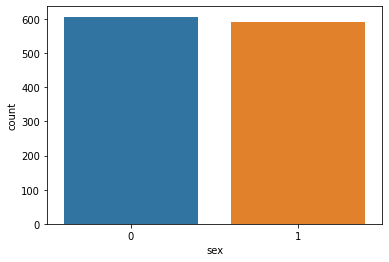

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='sex',data=data)

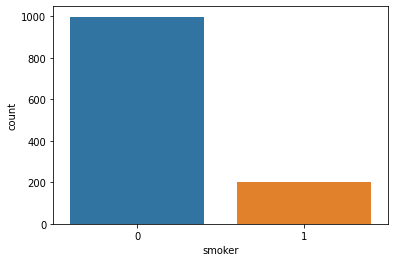

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='smoker',data=data)

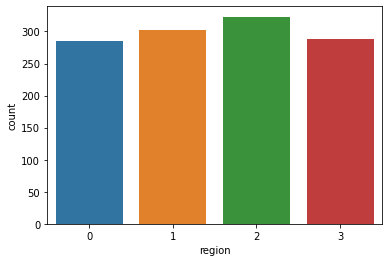

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='region',data=data)

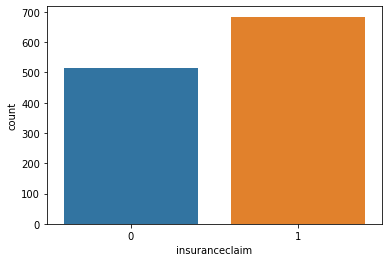

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='insuranceclaim',data=data)

In [ ]:
plt.rcParams['figure.figsize'] = (10, 4)
sns.countplot(data['children'])
plt.show()

NameError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


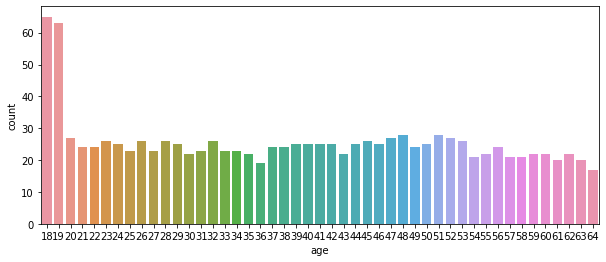

In [ ]:
plt.rcParams['figure.figsize'] = (10, 4)
sns.countplot(data['age'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


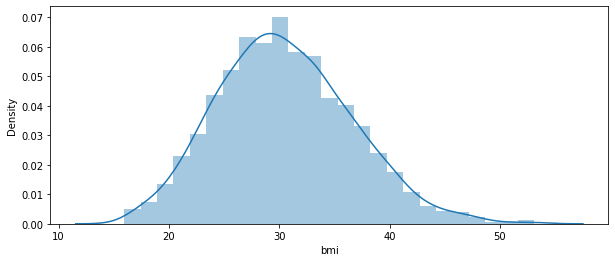

In [ ]:
plt.rcParams['figure.figsize'] = (10, 4)
sns.distplot(data['bmi'])
plt.show()

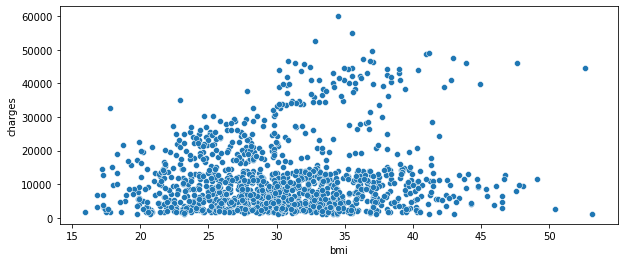

In [ ]:
sns.scatterplot(x=data['bmi'],y=data['charges'])

# Standard Scaler

keguanaannya untuk mengubah data Anda sehingga distribusinya akan memiliki nilai rata-rata 0 dan standar deviasi 1

In [ ]:
X = data.drop(columns='insuranceclaim', axis=1)
Y = data['insuranceclaim']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data[['age', 'bmi','children','region','charges']])
print(scaled)

[[0.02173913 0.3212268  0.         1.         0.2676261 ]
 [0.         0.47914985 0.2        0.66666667 0.01024929]
 [0.2173913  0.45843422 0.6        0.66666667 0.05649601]
 ...
 [0.         0.56201238 0.         0.66666667 0.00862417]
 [0.06521739 0.26472962 0.         1.         0.01504377]
 [0.93478261 0.35270379 0.         0.33333333 0.47571668]]


In [ ]:
X[['age', 'bmi','children','region','charges']] =  scaler.fit_transform(X[['age', 'bmi','children','region','charges']])
X

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0,0.321227,0.0,1,1.000000,0.267626
1,0.000000,1,0.479150,0.2,0,0.666667,0.010249
2,0.217391,1,0.458434,0.6,0,0.666667,0.056496
3,0.326087,1,0.181464,0.0,0,0.333333,0.354207
4,0.304348,1,0.347592,0.0,0,0.333333,0.046604
...,...,...,...,...,...,...,...
1333,0.695652,1,0.403820,0.6,0,0.333333,0.160930
1334,0.000000,0,0.429379,0.0,0,0.000000,0.018406
1335,0.000000,0,0.562012,0.0,0,0.666667,0.008624
1336,0.065217,0,0.264730,0.0,0,1.000000,0.015044


# Model Logistic Regression

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=0)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1198, 7) (958, 7) (240, 7)


In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[ 78,  25],
       [ 15, 122]])

Text(0.5, 257.44, 'Predicted label')

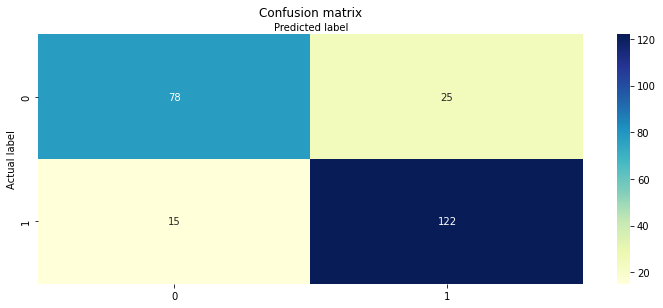

In [ ]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.8333333333333334
Precision: 0.8299319727891157
Recall: 0.8905109489051095


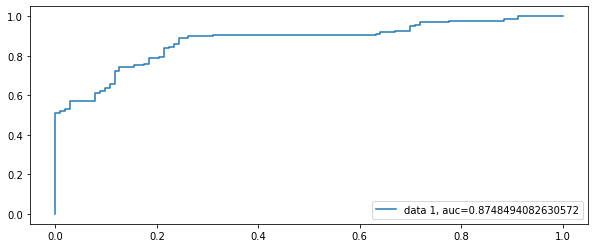

In [ ]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       103
           1       0.83      0.89      0.86       137

    accuracy                           0.83       240
   macro avg       0.83      0.82      0.83       240
weighted avg       0.83      0.83      0.83       240



# LR HT

In [ ]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = GridSearchCV(model, param_grid = param_grid, cv = 10, verbose=True, n_jobs= -1)

In [ ]:
best_clf = clf.fit(X_train,Y_train)

Fitting 10 folds for each of 1600 candidates, totalling 16000 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
7200 fits failed out of a total of 16000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: 

In [ ]:
best_clf.best_params_

{'C': 1.623776739188721, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [ ]:
best_clf.best_estimator_

LogisticRegression(C=1.623776739188721)

In [ ]:
print (f'Accuracy - : {best_clf.score(X_train,Y_train):.3f}')

Accuracy - : 0.888


# Model Decission Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)

In [ ]:
from sklearn import tree

Accuracy = 0.97
Recall = 0.96



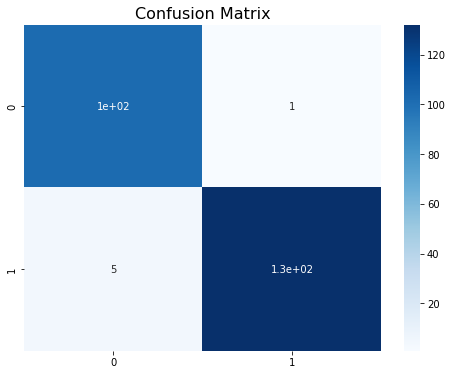

In [ ]:
print(f'Accuracy = {accuracy_score(Y_test, y_pred):.2f}\nRecall = {recall_score(Y_test, y_pred):.2f}\n')
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.975


In [ ]:
f1_score(Y_test, y_pred, average='macro')

0.9746031746031747

In [ ]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       103
           1       0.99      0.96      0.98       137

    accuracy                           0.97       240
   macro avg       0.97      0.98      0.97       240
weighted avg       0.98      0.97      0.98       240



In [ ]:
print('Akurasi:', accuracy_score(Y_test, y_pred))
print('Presisi:', precision_score(Y_test, y_pred))
print('Recall:', recall_score(Y_test, y_pred))

Akurasi: 0.975
Presisi: 0.9924812030075187
Recall: 0.9635036496350365


# DC HT

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [ ]:
param_dict={
    "criterion":['gini','entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)}

In [ ]:
grid = GridSearchCV(clf,
                    param_grid = param_dict,
                    cv=5,
                    verbose=1,
                    n_jobs=-1)

grid.fit(X_train,Y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a flo

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [ ]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 7}

In [ ]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=7)

In [ ]:
grid.best_score_

0.9885089441535777

In [ ]:
grid_model= DecisionTreeClassifier(criterion='entropy',max_depth=9,min_samples_leaf=1,min_samples_split=3)
grid_model.fit(X_train,Y_train)
y_pred_hyp = grid_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
#Check performa dari model
print(classification_report(Y_test,y_pred_hyp))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       103
           1       0.99      0.98      0.99       137

    accuracy                           0.98       240
   macro avg       0.98      0.98      0.98       240
weighted avg       0.98      0.98      0.98       240



In [ ]:
print('Akurasi:', accuracy_score(Y_test,y_pred_hyp))
print('Presisi:', precision_score(Y_test,y_pred_hyp))
print('Recall:', recall_score(Y_test,y_pred_hyp))

Akurasi: 0.9833333333333333
Presisi: 0.9925925925925926
Recall: 0.9781021897810219


# SVM

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

In [ ]:
print('Akurasi:', accuracy_score(Y_test, Y_pred))
print('Presisi:', precision_score(Y_test, Y_pred))
print('Recall:', recall_score(Y_test, Y_pred))

Akurasi: 0.8125
Presisi: 0.8484848484848485
Recall: 0.8175182481751825


In [ ]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       103
           1       0.85      0.82      0.83       137

    accuracy                           0.81       240
   macro avg       0.81      0.81      0.81       240
weighted avg       0.81      0.81      0.81       240



# SVM HT

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [ ]:
#Support Vector Machine
param_grid = {'C' : 10.0 ** np.arange(-3,4),
              'gamma' : 10.0 ** np.arange(-3,4),
              }
grid = GridSearchCV(SVC(), cv = 5, param_grid = param_grid)
grid.fit(X,Y)
svm = grid.best_estimator_

In [ ]:
grid.best_params_

{'C': 1000.0, 'gamma': 0.1}

In [ ]:
grid.best_estimator_

SVC(C=1000.0, gamma=0.1)

In [ ]:
svm_val = grid.best_score_

In [ ]:
svm_test = accuracy_score(Y_test, svm.predict(X_test))

In [ ]:
target_names = ['Claim', 'No']
print(classification_report(Y_test, svm.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

       Claim       0.84      0.94      0.89       103
          No       0.95      0.87      0.91       137

    accuracy                           0.90       240
   macro avg       0.90      0.91      0.90       240
weighted avg       0.91      0.90      0.90       240



# XG boost

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
xgb.fit(X_train, Y_train)
y_predict_xgboost=xgb.predict(X_test)
cv = cross_val_score(xgb,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())

[0.984375   0.96875    0.97395833 0.96858639 0.94764398]
0.9686627399650959


Accuracy = 0.95
Recall = 0.94



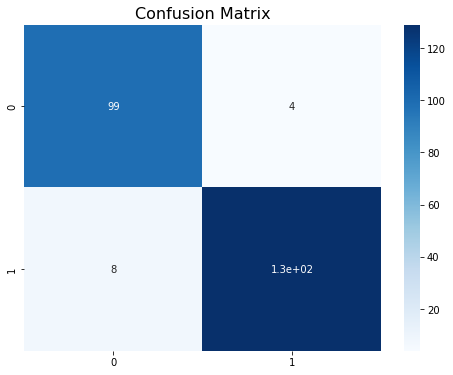

In [ ]:
print(f'Accuracy = {accuracy_score(Y_test, y_predict_xgboost):.2f}\nRecall = {recall_score(Y_test, y_predict_xgboost):.2f}\n')
cm = confusion_matrix(Y_test, y_predict_xgboost)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [ ]:
#Prediksi menggunakan model baru
from sklearn.metrics import classification_report
#Check performa dari model
print(classification_report(Y_test, y_predict_xgboost))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       103
           1       0.97      0.94      0.96       137

    accuracy                           0.95       240
   macro avg       0.95      0.95      0.95       240
weighted avg       0.95      0.95      0.95       240



In [ ]:
print('Akurasi:', accuracy_score(Y_test, y_predict_xgboost))
print('Presisi:', precision_score(Y_test, y_predict_xgboost))
print('Recall:', recall_score(Y_test, y_predict_xgboost))

Akurasi: 0.95
Presisi: 0.9699248120300752
Recall: 0.9416058394160584


# XGboost HT

In [ ]:
xgb = XGBClassifier(random_state = 42)

param_grid = {
    'n_estimators': [200, 300],
    'colsample_bytree': [0.5],
    'max_depth': [ 5, 10],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[ 0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train,Y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [ ]:
best_clf_xgb.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.5,
 'learning_rate': 0.5,
 'max_depth': 10,
 'min_child_weight': 0.01,
 'n_estimators': 300,
 'reg_alpha': 1,
 'reg_lambda': 2,
 'sampling_method': 'uniform',
 'subsample': 0.65}

In [ ]:
best_clf_xgb.best_estimator_

XGBClassifier(colsample_bytree=0.5, gamma=0.5, learning_rate=0.5, max_depth=10,
              min_child_weight=0.01, n_estimators=300, random_state=42,
              reg_alpha=1, reg_lambda=2, sampling_method='uniform',
              subsample=0.65)

In [ ]:
y_predicted_xgbt = best_clf_xgb.predict(X_test)

Akurasi: 0.9708333333333333
Presisi: 0.9710144927536232
Recall: 0.9781021897810219


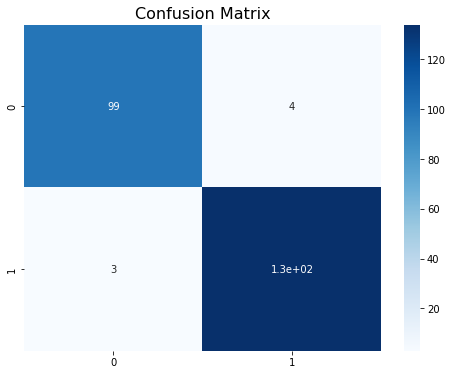

In [ ]:
print('Akurasi:', accuracy_score(Y_test, y_predicted_xgbt))
print('Presisi:', precision_score(Y_test, y_predicted_xgbt))
print('Recall:', recall_score(Y_test, y_predicted_xgbt))
cm = confusion_matrix(Y_test,y_predicted_xgbt)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [ ]:
print('Akurasi:', accuracy_score(Y_test, y_predicted_xgbt))
print('Presisi:', precision_score(Y_test, y_predicted_xgbt))
print('Recall:', recall_score(Y_test, y_predicted_xgbt))

Akurasi: 0.9708333333333333
Presisi: 0.9710144927536232
Recall: 0.9781021897810219


In [ ]:
from sklearn.metrics import classification_report
#Check performa dari model
print(classification_report(Y_test,y_predicted_xgbt))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       103
           1       0.97      0.98      0.97       137

    accuracy                           0.97       240
   macro avg       0.97      0.97      0.97       240
weighted avg       0.97      0.97      0.97       240

